# Filtering or Detrending using Regression

We will be discussing filtering in-depth in subsequent sections, but one filtering or detrending technique is to use linear regression.

Consider the decomposition of a variable $y(t)$ into two parts: the fraction that is linearly related to $x(t)$ and the fraction that is uncorrelated with $x(t)$:

$$
y(t) = y(t)_{fitted} + y(t)_{residual}
$$

where $y(t)_{fitted}$ is the best-fit linear relationship between $y(t)$ and $x(t)$. 


Thus, 
- the fraction of variance of $y(t)$ explained by $x(t)$ is $r^2$: the ratio of variance of $y(t)_{fitted}$ to $y(t)$ and,
- the fraction of variance of $y(t)$ that is not explained by $x(t)$ is 1 - $r^2$: the ratio of variance of $y(t)_{residual}$ to $y(t)$.

## Detrending

The above decomposition allows us to isolate $y(t)_{residual}$ which we sometimes want to do. If $y(t)_{fitted}$ represents a linear trend, $y(t)_{residual}$ is then the **detrended** component of $y(t)$.

## Filtering 

Let's take a look at a **filtering** example using our ENSO and California precipitation data.

In [1]:
# load packages
import numpy as np
import pickle as pickle
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16,weight='bold') #set default font size and weight for plots

In [2]:
# ENSO Data:
# unpickle NINO34 (units of degC)
with open('NINO34_NDJF.pickle','rb') as fp: #.pickle files are a python file type
    nino34 = pickle.load(fp,encoding='latin1')[0]

#  Precipitation Data:
#  unpickle CA_PRECIP_DJFM (units of mm/day)
with open('CA_PRECIP_DJFM.pickle','rb') as fp: #.pickle files are a python file type
    precip_djfm = pickle.load(fp,encoding='latin1')

The $y(t)_{fitted}$ component is simply the best-fit line between $y(t)$ and $x(t)$ - in this case, CA precipitation and ENSO.

In [4]:
# calculate best-fit line

# np.polyfit(predictor, predictand, degree)
a = np.polyfit(nino34,precip_djfm,1) #polynomial fit, degree = 1 means a linear fit

# np.polyval(coeffs,predictor)
y_hat = np.polyval(a,nino34)

Now, we can *filter* out the influence of ENSO on California precipitation. Why would one want to do this? We might want to do this if we are looking for a relationship between California precipitation and something other than ENSO, but the ENSO influence is too strong to allow us to identify this secondary relationship.

This filtered out part is $y(t)_{residual}$.

In [5]:
# Filter out the ENSO signal from CA precip
precip_djfm_noENSO = precip_djfm - y_hat

Let's see how the original, the fitted and filtered precipitation time series compare.

(-3.0, 8.0)

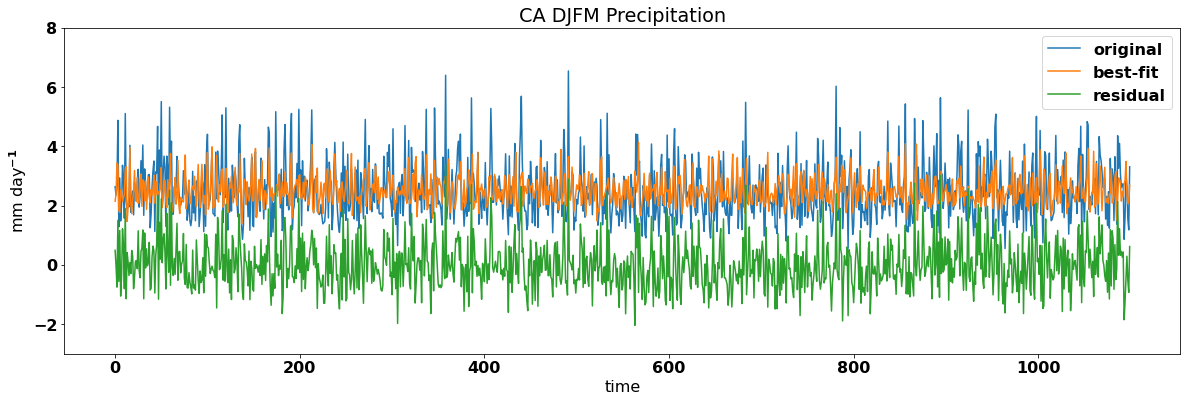

In [18]:
# plot the precip and filterd precip time series
plt.figure(figsize=(20,6))
plt.plot(precip_djfm,label="original")
plt.plot(y_hat,label="best-fit")
plt.plot(precip_djfm_noENSO,label="residual")
plt.title("CA DJFM Precipitation")
plt.ylabel("mm day$^{-1}$")
plt.xlabel("time")
plt.legend(loc="upper right")
plt.ylim(-3,8)